# Homework 3: Surface Temperature Composites With Hurricane Activity

I've changed my project to using UFS P7 Reforecast data (z500, TS, and Precip) for August September and October looking at the Southeast region of the United States, and seeing if I can use that data to predict hurricane activity (or something like that).

z500 is the 500 hPa geopotential height and measured in meters, which can show places of low and high pressure on contour maps, which is useful when locating potential storms. 

TS is the surface temperature and measured in kelvin. It is useful when looking at the ocean surface temperature especially since the ocean has a high heat capacity and stays warmer longer than the land surface. Since tropical storms form in warmer waters, the surface temperature can help indicate where tropical storms might occur or move toward. 

Precip is the precipitation and measured in mm/day. It is useful to locate areas of heavy precipitation in the case of storm identification.

For homework 3, I used the Hurricane Activity Index. 

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
import cartopy.feature as feature

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd

# Importing the Index

For this assignment, I've chosen the Hurricane Activity Index (HAI), which I found on https://psl.noaa.gov/data/climateindices/list/ when reading information about the indices. HAI gives the monthly totals of Atlantic hurricanes and named storms and was updated to 2016. 

Since my dataset is from 2011-2017, and the index goes till 2016, I will look at 2011-2016 for both. 

HAI was imported and downloaded using the directions from the notebook supplied in the assignment directions.

In [2]:
path='/home/ldoyle4/'
file='hurricane.data'
index_name='ha'

df=pd.read_table(path+file,skiprows=64,
                 header=None,delim_whitespace=True,
                 index_col=0,parse_dates=True,
                 na_values=['-99.9','-99.90'])
df.drop(df.tail(6).index,inplace=True)

In [3]:
start_date=str(df.index[0])+'-'+str(df.columns[0])+'-01'
end_date=str(df.index[-1])+'-'+str(df.columns[-1])+'-31'
print(start_date)
print(end_date)

2011-1-01
2016-12-31


In [4]:
dates=pd.date_range(start=start_date,end=end_date,freq='MS')
dates

DatetimeIndex(['2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',
               '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01',
               '2011-09-01', '2011-10-01', '2011-11-01', '2011-12-01',
               '2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01',
               '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01',
               '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01',
               '2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
               '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
      

In [5]:
clim_index=df.T.unstack().values
clim_index=clim_index.astype('float32')

In [6]:
ds_index=xr.DataArray(clim_index,
                      coords={'time':dates},
                              dims=['time'])        
ds_index=ds_index.to_dataset(name='ha')
ds_index

<xarray.Dataset>
Dimensions:  (time: 72)
Coordinates:
  * time     (time) datetime64[ns] 2011-01-01 2011-02-01 ... 2016-12-01
Data variables:
    ha       (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 6.0 3.5 15.5 1.5 0.0

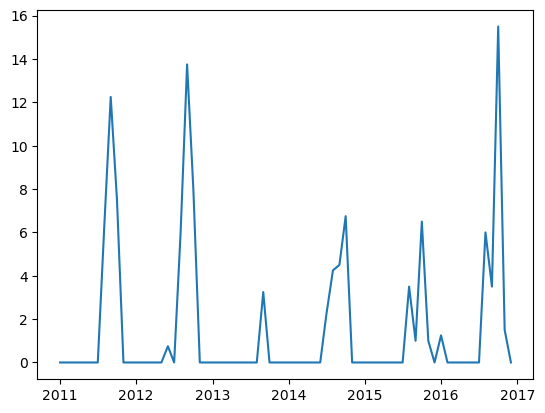

In [7]:
plt.plot(ds_index['time'],ds_index['ha'])

According to the index, there were 15.5 storms in October 2016. I don't believe this is accurate, and am not sure how to correct this error. I may have to do it manually, by finding out how many storms there were and editing the data file with a text editor.

# TS Data

Ideally, I want to do this assignment using TS, z500, and precipitation. For now, I've only done it using TS. 

In [8]:
file='/scratch/ldoyle4/subset/ts.nc'
ds_ts = xr.open_dataset(file)
ds_ts

<xarray.Dataset>
Dimensions:    (time: 558, latitude: 53, longitude: 89)
Coordinates:
  * time       (time) datetime64[ns] 2011-08-01 2011-08-02 ... 2016-10-31
  * latitude   (latitude) float64 36.0 35.75 35.5 35.25 ... 23.5 23.25 23.0
  * longitude  (longitude) float64 265.0 265.2 265.5 265.8 ... 286.5 286.8 287.0
Data variables:
    ts         (time, latitude, longitude) float64 ...
Attributes:
    history:                   Mon Oct 10 18:10:15 2022: ncatted -a calendar,...
    NCO:                       netCDF Operators version 4.7.5 (Homepage = htt...
    nco_openmp_thread_number:  1

In [9]:
#resample the data from daily to monthly, since the index is monthly
ts_mon1 = ds_ts.resample(time="MS").mean()

In [10]:
ts_mon1

<xarray.Dataset>
Dimensions:    (time: 63, latitude: 53, longitude: 89)
Coordinates:
  * time       (time) datetime64[ns] 2011-08-01 2011-09-01 ... 2016-10-01
  * latitude   (latitude) float64 36.0 35.75 35.5 35.25 ... 23.5 23.25 23.0
  * longitude  (longitude) float64 265.0 265.2 265.5 265.8 ... 286.5 286.8 287.0
Data variables:
    ts         (time, latitude, longitude) float64 305.2 304.0 ... 302.0 302.0

Since we've resampled the data, the months now span a yearly range, which we don't want, since we only want August through October for each year. So to fix that, I wrote a line that selects the 8th, 9th, and 10th months of every year. 

I'm not sure if this is the right approach, but it's the one that didn't give me an error so it's the one I went with. 

In [11]:
def is_ASO(month):
    return (month >= 8) & (month <= 10)
ts_monthly = ts_mon1.sel(time=is_ASO(ts_mon1['time.month']))

In [12]:
ts_monthly

<xarray.Dataset>
Dimensions:    (time: 18, latitude: 53, longitude: 89)
Coordinates:
  * time       (time) datetime64[ns] 2011-08-01 2011-09-01 ... 2016-10-01
  * latitude   (latitude) float64 36.0 35.75 35.5 35.25 ... 23.5 23.25 23.0
  * longitude  (longitude) float64 265.0 265.2 265.5 265.8 ... 286.5 286.8 287.0
Data variables:
    ts         (time, latitude, longitude) float64 305.2 304.0 ... 302.0 302.0

I've also selected the 8th, 9th, and 10th months from the index to match with the dataset.

In [13]:
def is_ASO(month):
    return (month >= 8) & (month <= 10)
ha_index = ds_index.sel(time=is_ASO(ds_index['time.month']))

In [14]:
ha_index

<xarray.Dataset>
Dimensions:  (time: 18)
Coordinates:
  * time     (time) datetime64[ns] 2011-08-01 2011-09-01 ... 2016-10-01
Data variables:
    ha       (time) float32 6.25 12.25 7.5 6.0 13.75 ... 1.0 6.5 6.0 3.5 15.5

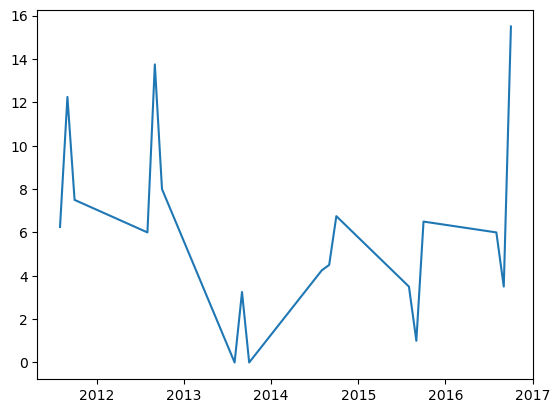

In [15]:
plt.plot(ha_index['time'],ha_index['ha'])

We see from the plot that we have some spikes in activity over time (until I fix October 2016, that will end up being the highest). 

As a general observation, and from the tropical storm and hurricane frequency plot with a climatology from 1851-2017 (Landsea, Chris (contributor from the NHC). "Total and Average Number of Tropical Cylones by Month (1851-2017)". aoml.noaa.gov. National Oceanic and Atmospheric Administration, Atlantic Oceanographic and Meteorological Laboratory. Archived from the original on September 1, 2018.) we see that September is the most active month, with an average of 6 storms, Augsut is the 2nd most active month, with an average of 4 storms, and October is the third most active month, with an average of 3 storms. This is why I have chosen August, September, and October as the months of investigation for my dataset. 

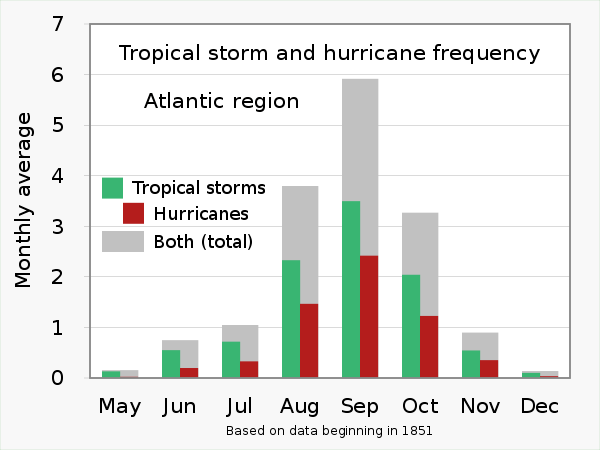

For August, September, and October, the composite I am making is looking at the 3 largest and 3 smallest valued years for HAI for each month. 

To do this, I need to find the month with the most storms and the month with the least storms for each year. 

We can just look at the data and do this by hand.


August: 6.25=2011, 6=2012, 0=2013, 4.25=2014, 3.5=2015, 6=2016

September: 12.25=2011, 13.37=2012, 3.25=2013, 4.5=2014, 1=2015, 3.5=2016

October: 7.5=2011, 8=2012, 0=2013, 6.75=2014, 6.5=2015, 15.5=2016

For August: 
* 3 largest years: 2011, 2012, 2016
* 3 smallest years: 2013, 2014, 2015

For September:
* 3 largest years: 2012, 2011, 2014
* 3 smallest years: 2015, 2013, 2016

For October: 
* 3 largest years: 2016, 2012, 2011
* 3 smallest years: 2013, 2014, 2015

Interestingly, August and October match up in terms of years.

I guess I should add these up now, if I'm interpreting this correctly:

August:
* largest number of storms total: 18.25
* smallest number of storms total: 7.75

September:
* largest number of storms total: 30.12
* smallest number of storms total: 7.75

October: 
* largest number of storms total: 31
* smallest number of storms total: 13.25




In [16]:
august1=ha_index['ha'].where(ha_index['ha']==6.25)
august2=ha_index['ha'].where(ha_index['ha']==6)
print(august1)
print(august2)
august = august1.combine_first(august2)
august_high = august.dropna(dim='time')
print(august_high)

<xarray.DataArray 'ha' (time: 18)>
array([6.25,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2011-08-01 2011-09-01 ... 2016-10-01
<xarray.DataArray 'ha' (time: 18)>
array([nan, nan, nan,  6., nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan,  6., nan, nan], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2011-08-01 2011-09-01 ... 2016-10-01
<xarray.DataArray 'ha' (time: 3)>
array([6.25, 6.  , 6.  ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2011-08-01 2012-08-01 2016-08-01


In [17]:
september1=ha_index['ha'].where(ha_index['ha']==13.75)
september2=ha_index['ha'].where(ha_index['ha']==12.25)
september3=ha_index['ha'].where(ha_index['ha']==4.5)

print(september1)

september4 = september1.combine_first(september2)
september4

september = september4.combine_first(september3)

print(september)

september_high = september.dropna(dim='time')
print(september_high)

<xarray.DataArray 'ha' (time: 18)>
array([  nan,   nan,   nan,   nan, 13.75,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2011-08-01 2011-09-01 ... 2016-10-01
<xarray.DataArray 'ha' (time: 18)>
array([  nan, 12.25,   nan,   nan, 13.75,   nan,   nan,   nan,   nan,
         nan,  4.5 ,   nan,   nan,   nan,   nan,   nan,   nan,   nan],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2011-08-01 2011-09-01 ... 2016-10-01
<xarray.DataArray 'ha' (time: 3)>
array([12.25, 13.75,  4.5 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2011-09-01 2012-09-01 2014-09-01


In [18]:
october1=ha_index['ha'].where(ha_index['ha']==15.5)
october2=ha_index['ha'].where(ha_index['ha']==8)
october3=ha_index['ha'].where(ha_index['ha']==7.5)
october4 = october1.combine_first(october2)
print(october4)

october = october4.combine_first(october3)

october_high = october.dropna(dim='time')
print(october_high)

<xarray.DataArray 'ha' (time: 18)>
array([ nan,  nan,  nan,  nan,  nan,  8. ,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan, 15.5], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2011-08-01 2011-09-01 ... 2016-10-01
<xarray.DataArray 'ha' (time: 3)>
array([ 7.5,  8. , 15.5], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2011-10-01 2012-10-01 2016-10-01


In [19]:
print('August: ',august_high.count(dim='time').values)
print('September: ',september_high.count(dim='time').values)
print('October: ',october_high.count(dim='time').values)

August:  3
September:  3
October:  3


In [20]:
august1l=ha_index['ha'].where(ha_index['ha']==0)
august2l=ha_index['ha'].where(ha_index['ha']==4.25)
august3l=ha_index['ha'].where(ha_index['ha']==3.5)

august4l = august1l.combine_first(august2l)
augustl = august4l.combine_first(august3l)

august_lowl = augustl.dropna(dim='time')
august_lowl = august_lowl.drop_sel(time='2013-10-01')
august_lowl = august_lowl.drop_sel(time='2016-09-01')
print(august_lowl)

<xarray.DataArray 'ha' (time: 3)>
array([0.  , 4.25, 3.5 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2013-08-01 2014-08-01 2015-08-01


In [21]:
september1l=ha_index['ha'].where(ha_index['ha']==3.25)
september2l=ha_index['ha'].where(ha_index['ha']==1)
september3l=ha_index['ha'].where(ha_index['ha']==3.5)

september4l = september1l.combine_first(september2l)
septemberl = september4l.combine_first(september3l)

september_lowl = septemberl.dropna(dim='time')
september_lowl = september_lowl.drop_sel(time='2015-08-01')
print(september_lowl)

<xarray.DataArray 'ha' (time: 3)>
array([3.25, 1.  , 3.5 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2013-09-01 2015-09-01 2016-09-01


In [22]:
october1l=ha_index['ha'].where(ha_index['ha']==0)
october2l=ha_index['ha'].where(ha_index['ha']==6.75)
october3l=ha_index['ha'].where(ha_index['ha']==6.5)

october4l = october1l.combine_first(october2l)
octoberl = october4l.combine_first(october3l)

october_lowl = octoberl.dropna(dim='time')
october_lowl = october_lowl.drop_sel(time='2013-08-01')

print(october_lowl)

<xarray.DataArray 'ha' (time: 3)>
array([0.  , 6.75, 6.5 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2013-10-01 2014-10-01 2015-10-01


## Surface Temperature Climatology

In [23]:
clim = ts_monthly['ts'].groupby('time.month').mean()
clim

<xarray.DataArray 'ts' (month: 3, latitude: 53, longitude: 89)>
array([[[303.04672586, 301.65720962, 301.48691329, ..., 301.34309666,
         301.1486067 , 300.98341895],
        [303.74269326, 301.68556968, 300.81742473, ..., 301.28812376,
         301.04215544, 300.81876816],
        [304.46325716, 304.07925317, 303.99471008, ..., 301.1562685 ,
         300.9464565 , 300.7502199 ],
        ...,
        [302.94685963, 302.94376837, 302.92616083, ..., 302.11540837,
         302.09524684, 302.07132204],
        [302.90478979, 302.89578464, 302.88261286, ..., 302.09000491,
         302.0680962 , 302.03462892],
        [302.85720981, 302.84914443, 302.84309637, ..., 302.05384892,
         302.0246822 , 301.98771996]],

       [[298.41276936, 297.34874174, 297.0551303 , ..., 300.71540803,
         300.57610262, 300.46318597],
        [299.05957497, 297.39013036, 296.73013022, ..., 300.69707519,
         300.54054756, 300.40638029],
        [299.77874133, 299.25915841, 299.10901947, ..., 300.67179773,
         300.52138074, 300.38526967],
...
        [302.5791587 , 302.58540887, 302.59263089, ..., 302.26457464,
         302.24485249, 302.23235228],
        [302.56429719, 302.57735291, 302.58526993, ..., 302.26124123,
         302.24846336, 302.23429697],
        [302.5623528 , 302.57513055, 302.58082496, ..., 302.2442969 ,
         302.2434633 , 302.23013013]],

       [[289.52744011, 288.8707207 , 288.93908131, ..., 299.23477062,
         299.1788851 , 299.05823402],
        [290.15779146, 288.82938027, 288.71156756, ..., 299.33083804,
         299.20161895, 299.04598133],
        [290.79142451, 290.47207475, 290.38246628, ..., 299.31769987,
         299.1716582 , 299.00105949],
        ...,
        [301.43704947, 301.45060396, 301.44861182, ..., 301.8012677 ,
         301.81290833, 301.82409354],
        [301.48227104, 301.48221878, 301.46970578, ..., 301.83124165,
         301.8418798 , 301.86223141],
        [301.50641175, 301.49193239, 301.46714056, ..., 301.86064291,
         301.87527863, 301.88927587]]])
Coordinates:
  * latitude   (latitude) float64 36.0 35.75 35.5 35.25 ... 23.5 23.25 23.0
  * longitude  (longitude) float64 265.0 265.2 265.5 265.8 ... 286.5 286.8 287.0
  * month      (month) int64 8 9 10

In [24]:
clim[0,:,:]

<xarray.DataArray 'ts' (latitude: 53, longitude: 89)>
array([[303.04672586, 301.65720962, 301.48691329, ..., 301.34309666,
        301.1486067 , 300.98341895],
       [303.74269326, 301.68556968, 300.81742473, ..., 301.28812376,
        301.04215544, 300.81876816],
       [304.46325716, 304.07925317, 303.99471008, ..., 301.1562685 ,
        300.9464565 , 300.7502199 ],
       ...,
       [302.94685963, 302.94376837, 302.92616083, ..., 302.11540837,
        302.09524684, 302.07132204],
       [302.90478979, 302.89578464, 302.88261286, ..., 302.09000491,
        302.0680962 , 302.03462892],
       [302.85720981, 302.84914443, 302.84309637, ..., 302.05384892,
        302.0246822 , 301.98771996]])
Coordinates:
  * latitude   (latitude) float64 36.0 35.75 35.5 35.25 ... 23.5 23.25 23.0
  * longitude  (longitude) float64 265.0 265.2 265.5 265.8 ... 286.5 286.8 287.0
    month      int64 8

I made a contour plot of the first time stamp just to see what it looks like.

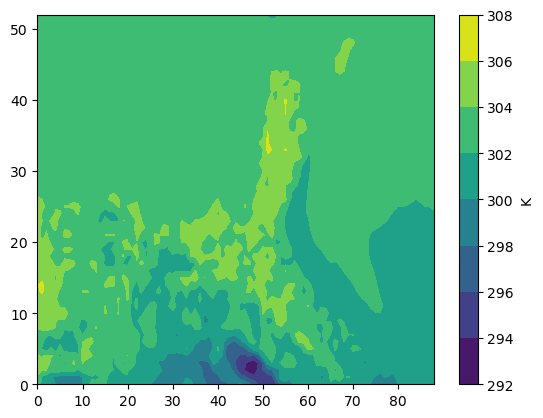

In [25]:
cs = plt.contourf(clim[0,:,:])
plt.colorbar(cs, label='K')

## Surface Temperature Anomalies

In [26]:
ds_anoms = ts_monthly['ts'].groupby('time.month')-clim

In [27]:
ds_anoms

<xarray.DataArray 'ts' (time: 18, latitude: 53, longitude: 89)>
array([[[ 2.10421679,  2.35905575,  2.77693308, ...,  0.2465566 ,
          0.22088537,  0.2247828 ],
        [ 2.25744481,  3.54359961,  3.20206837, ...,  0.23540062,
          0.22491865,  0.21685274],
        [ 2.28204042,  2.16443216,  1.99978322, ...,  0.23741638,
          0.22626192,  0.2095946 ],
        ...,
        [ 0.11053606,  0.12330484,  0.12800861, ...,  0.17101977,
          0.15489049,  0.13365223],
        [ 0.10341181,  0.11886822,  0.11591048, ...,  0.17384195,
          0.16591111,  0.14131452],
        [ 0.10905719,  0.1163141 ,  0.09252384, ...,  0.17531988,
          0.15851974,  0.11241757]],

       [[ 1.23246125,  1.40565508,  1.39343359, ..., -1.75851156,
         -1.77920524, -1.75545536],
        [ 0.96398943,  1.89760056,  1.51593403, ..., -1.78850967,
         -1.74198291, -1.62948286],
        [ 0.88065529,  0.88857337,  0.77537893, ..., -1.76239832,
         -1.68114866, -1.54170456],
...
        [ 0.19024412,  0.17982729,  0.17927183, ..., -0.40183864,
         -0.3421171 , -0.26461699],
        [ 0.22760599,  0.22288411,  0.21663411, ..., -0.36600579,
         -0.29656135, -0.21072773],
        [ 0.29205089,  0.27510596,  0.26357812, ..., -0.30656115,
         -0.25406053, -0.1765611 ]],

       [[ 1.64786406,  1.74583427,  1.79942691, ...,  0.40584723,
          0.22173059,  0.06035086],
        [ 1.84806029,  1.43490744,  1.55068882, ...,  0.41790501,
          0.35407563,  0.32205757],
        [ 1.82801962,  1.68627644,  1.59393076, ...,  0.62275962,
          0.55528696,  0.56260518],
        ...,
        [ 0.54973976,  0.5939188 ,  0.63005249, ...,  0.08083407,
          0.10919293,  0.1426175 ],
        [ 0.55943958,  0.59753915,  0.63481836, ...,  0.06546851,
          0.10178379,  0.12549527],
        [ 0.58686141,  0.63407588,  0.67488325, ...,  0.06270838,
          0.09463461,  0.11555902]]])
Coordinates:
  * time       (time) datetime64[ns] 2011-08-01 2011-09-01 ... 2016-10-01
  * latitude   (latitude) float64 36.0 35.75 35.5 35.25 ... 23.5 23.25 23.0
  * longitude  (longitude) float64 265.0 265.2 265.5 265.8 ... 286.5 286.8 287.0
    month      (time) int64 8 9 10 8 9 10 8 9 10 8 9 10 8 9 10 8 9 10

Again, making a contour plot to see what the anomalies look like, and if they make visual sense.

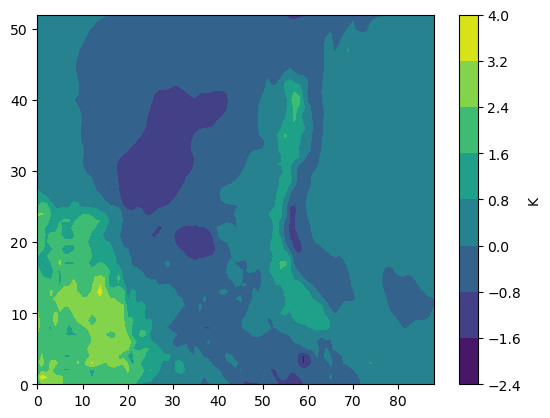

In [28]:
cs = plt.contourf(ds_anoms[0,:,:])
plt.colorbar(cs, label='K')

# Composites:

## Plotting Monthly Surface Temperature Anomalies Corresponding With Highest Hurricane Activity

In [29]:
august_ts = ds_anoms.sel(time=august_high.dropna(dim='time')['time']).mean(dim='time')
september_ts = ds_anoms.sel(time=september_high.dropna(dim='time')['time']).mean(dim='time')
october_ts = ds_anoms.sel(time=october_high.dropna(dim='time')['time']).mean(dim='time')

comp = [august_ts,september_ts,october_ts]
comp

[<xarray.DataArray 'ts' (latitude: 53, longitude: 89)>
 array([[ 1.91425168e+00,  1.83548831e+00,  1.93400984e+00, ...,
          4.03095697e-01,  3.86294990e-01,  3.88579994e-01],
        [ 1.83172484e+00,  2.04583798e+00,  1.82903675e+00, ...,
          3.74735596e-01,  3.69628660e-01,  3.86295196e-01],
        [ 1.77863304e+00,  1.61586433e+00,  1.52325649e+00, ...,
          3.56052399e-01,  3.68821913e-01,  3.95972180e-01],
        ...,
        [-1.77280467e-01, -1.86285491e-01, -1.96635092e-01, ...,
          7.12921799e-03,  2.03004242e-02,  4.12677232e-02],
        [-1.93812832e-01, -2.02011396e-01, -2.15452338e-01, ...,
         -8.01619663e-04,  1.06226603e-02,  2.79614848e-02],
        [-2.19081263e-01, -2.23113562e-01, -2.35344548e-01, ...,
         -1.00765433e-02, -1.07119160e-03,  1.22353338e-02]])
 Coordinates:
   * latitude   (latitude) float64 36.0 35.75 35.5 35.25 ... 23.5 23.25 23.0
   * longitude  (longitude) float64 265.0 265.2 265.5 265.8 ... 286.5 286.8 287.0,
 

I've made the decision to make the plots separate, instead of as a loop, because I could not figure out how to add the colorbar into the loop without it giving the same bounds for each colorbar.

''

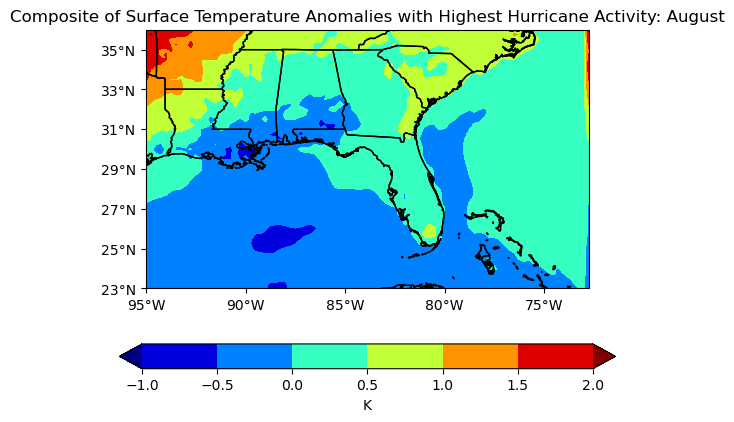

In [30]:
fig = plt.figure()

ax=plt.axes(projection=ccrs.PlateCarree())

data= august_ts
data, lons = add_cyclic_point(data, coord=august_ts['longitude'])

cs=ax.contourf(lons, august_ts['latitude'], data, 
            transform = ccrs.PlateCarree(),cmap='jet', extend='both')

ax.set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

ax.set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

ax.coastlines()
        
ax.add_feature(feature.STATES)

cbar = plt.colorbar(cs, orientation='horizontal',label='K') 

plt.title('Composite of Surface Temperature Anomalies with Highest Hurricane Activity: August')
;

''

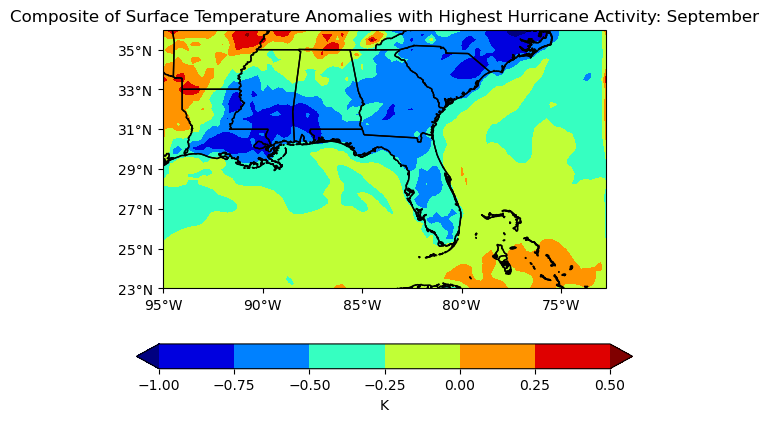

In [31]:
fig = plt.figure()

ax=plt.axes(projection=ccrs.PlateCarree())

data= september_ts
data, lons = add_cyclic_point(data, coord=september_ts['longitude'])

cs=ax.contourf(lons, september_ts['latitude'], data, 
            transform = ccrs.PlateCarree(),cmap='jet', extend='both')

ax.set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

ax.set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

ax.coastlines()
        
ax.add_feature(feature.STATES)

cbar = plt.colorbar(cs, orientation='horizontal',label='K') 

plt.title('Composite of Surface Temperature Anomalies with Highest Hurricane Activity: September')
;

''

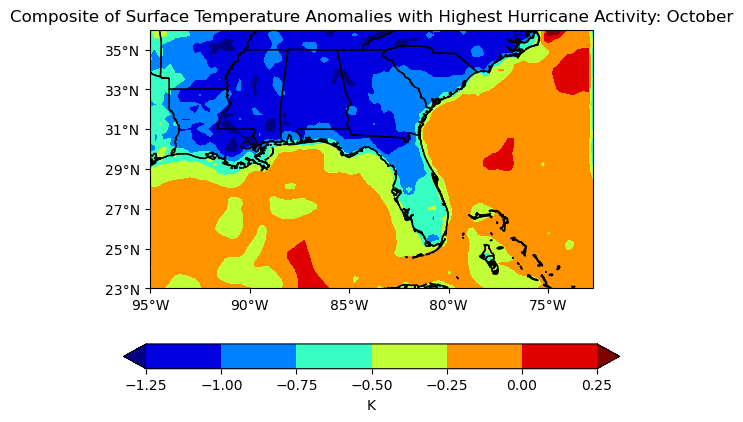

In [32]:
fig = plt.figure()

ax=plt.axes(projection=ccrs.PlateCarree())

data= october_ts
data, lons = add_cyclic_point(data, coord=october_ts['longitude'])

cs=ax.contourf(lons, october_ts['latitude'], data, 
            transform = ccrs.PlateCarree(),cmap='jet', extend='both')

ax.set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

ax.set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

ax.coastlines()
        
ax.add_feature(feature.STATES)

cbar = plt.colorbar(cs, orientation='horizontal',label='K') 

plt.title('Composite of Surface Temperature Anomalies with Highest Hurricane Activity: October')
;

## Plotting Monthly Surface Temperature Anomalies Corresponding With Lowest Hurricane Activity

In [33]:
august_tsl = ds_anoms.sel(time=august_lowl.dropna(dim='time')['time']).mean(dim='time')
september_tsl = ds_anoms.sel(time=september_lowl.dropna(dim='time')['time']).mean(dim='time')
october_tsl = ds_anoms.sel(time=october_lowl.dropna(dim='time')['time']).mean(dim='time')

compl = [august_tsl,september_tsl,october_tsl]
compl

[<xarray.DataArray 'ts' (latitude: 53, longitude: 89)>
 array([[-1.91425168e+00, -1.83548831e+00, -1.93400984e+00, ...,
         -4.03095697e-01, -3.86294990e-01, -3.88579994e-01],
        [-1.83172484e+00, -2.04583798e+00, -1.82903675e+00, ...,
         -3.74735596e-01, -3.69628660e-01, -3.86295196e-01],
        [-1.77863304e+00, -1.61586433e+00, -1.52325649e+00, ...,
         -3.56052399e-01, -3.68821913e-01, -3.95972180e-01],
        ...,
        [ 1.77280467e-01,  1.86285491e-01,  1.96635092e-01, ...,
         -7.12921799e-03, -2.03004242e-02, -4.12677232e-02],
        [ 1.93812832e-01,  2.02011396e-01,  2.15452338e-01, ...,
          8.01619663e-04, -1.06226603e-02, -2.79614848e-02],
        [ 2.19081263e-01,  2.23113562e-01,  2.35344548e-01, ...,
          1.00765433e-02,  1.07119160e-03, -1.22353338e-02]])
 Coordinates:
   * latitude   (latitude) float64 36.0 35.75 35.5 35.25 ... 23.5 23.25 23.0
   * longitude  (longitude) float64 265.0 265.2 265.5 265.8 ... 286.5 286.8 287.0,
 

''

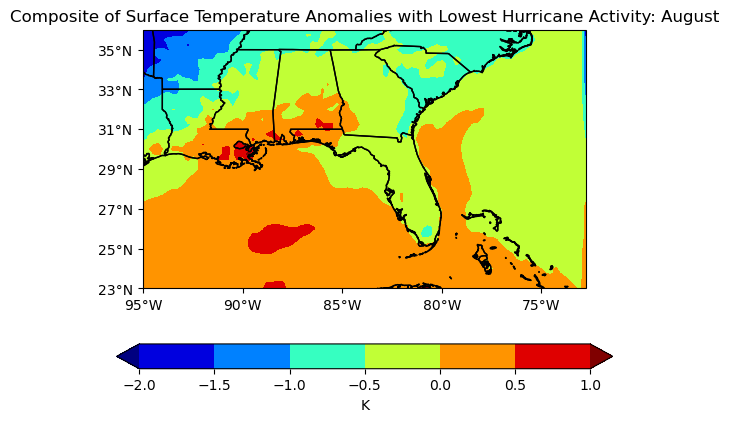

In [34]:
fig = plt.figure()

ax=plt.axes(projection=ccrs.PlateCarree())

data= august_tsl
data, lons = add_cyclic_point(data, coord=august_tsl['longitude'])

cs=ax.contourf(lons, august_tsl['latitude'], data, 
            transform = ccrs.PlateCarree(),cmap='jet', extend='both')

ax.set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

ax.set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

ax.coastlines()
        
ax.add_feature(feature.STATES)

cbar = plt.colorbar(cs, orientation='horizontal',label='K') 

plt.title('Composite of Surface Temperature Anomalies with Lowest Hurricane Activity: August')
;

''

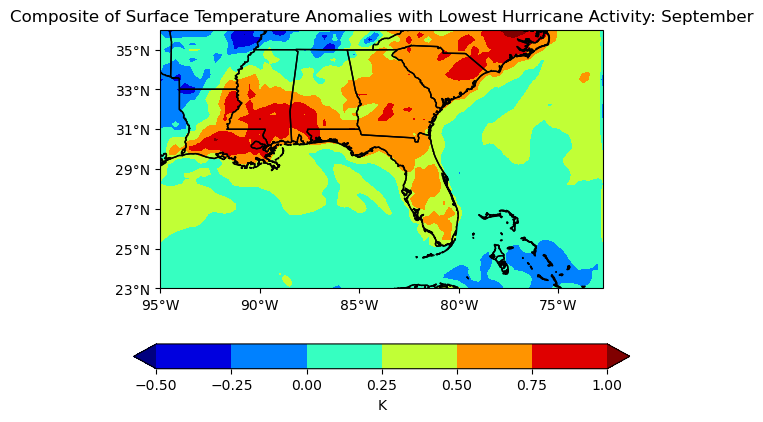

In [35]:
fig = plt.figure()

ax=plt.axes(projection=ccrs.PlateCarree())

data= september_tsl
data, lons = add_cyclic_point(data, coord=september_tsl['longitude'])

cs=ax.contourf(lons, september_tsl['latitude'], data, 
            transform = ccrs.PlateCarree(),cmap='jet', extend='both')

ax.set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

ax.set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

ax.coastlines()
        
ax.add_feature(feature.STATES)

cbar = plt.colorbar(cs, orientation='horizontal',label='K') 

plt.title('Composite of Surface Temperature Anomalies with Lowest Hurricane Activity: September')
;

''

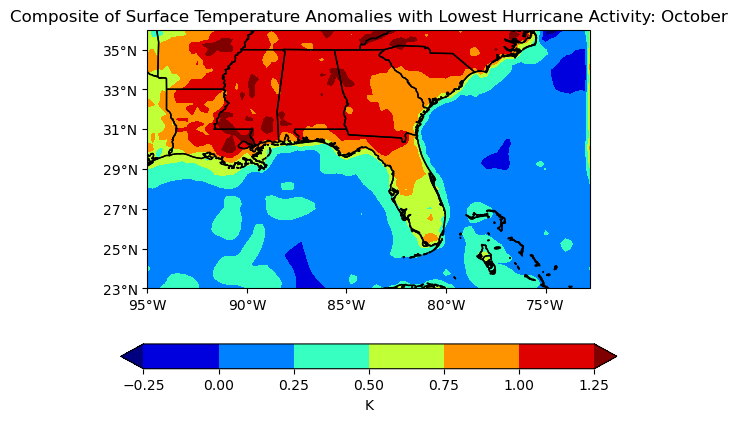

In [36]:
fig = plt.figure()

ax=plt.axes(projection=ccrs.PlateCarree())

data= october_tsl
data, lons = add_cyclic_point(data, coord=october_tsl['longitude'])

cs=ax.contourf(lons, october_tsl['latitude'], data, 
            transform = ccrs.PlateCarree(),cmap='jet', extend='both')

ax.set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

ax.set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

ax.coastlines()
        
ax.add_feature(feature.STATES)

cbar = plt.colorbar(cs, orientation='horizontal',label='K') 

plt.title('Composite of Surface Temperature Anomalies with Lowest Hurricane Activity: October')
;

# Discussion of Results:

An error I am getting across all 3 variables (temperature, z500, and precipitation) is that, somehow, it is working out exactly that the corresponding precipitation anomalies for highest and lowest activity are the exact opposite in magnitude of each other. I'm not sure how this is possible.

I tried a few different approaches. First, I tried comparing the anomalies versus the average over time, and found that the error was occurring during the mean over the time dimension. Next, I manually calculated the averages by implementing the .sum(dim='time') function, and dividing by the number of corresponding eyars (in this case, 3), but found that the error was still occurring in averaging over time. Next, I tried taking the anomalies as a time series, and found that I was getting different values at least, but not enough to draw conclusions about. Last, I tried selecting the dates and averaging manually, and found that this was the best approach to a solution. I got different values for composites, but I'm not sure how accurate this is, considering it's not a true average. 

I've included the code and plots from the last (successful) approach, and have included this approach in the z500 and precip notebooks as well.

Just to recall, these are the dates and their corresponding index value in the array:

august high: 2011-08-01 = 0, 2012-08-01 = 3, 2016-08-01 = 15

september high: 2011-09-01 = 1, 2012-09-01 = 4, 2014-09-01 = 10

october high: 2011-10-01 = 2, 2012-10-01 = 5, 2016-10-01 = 17

august low: 2013-08-01 = 6, 2014-08-01 = 9, 2015-08-01 = 12

september low: 2013-09-01 = 7, 2015-09-01 = 13, 2016-09-01 = 16

october low: 2013-10-01 = 8, 2014-10-01 = 11, 2015-10-01 = 14

I'm going to try this for August, just to see if it works.

## High Hurricane Activity

In [37]:
a1 = ds_anoms[0,:,:]
a2 = ds_anoms[3,:,:]
a3 = ds_anoms[15,:,:]

s1 = ds_anoms[1,:,:]
s2 = ds_anoms[4,:,:]
s3 = ds_anoms[10,:,:]

o1 = ds_anoms[2,:,:]
o2 = ds_anoms[5,:,:]
o3 = ds_anoms[17,:,:]

In [38]:
a4 = (a1 + a2) / 2
print(a4)

s4 = (s1 + s2) / 2
print(s4)

o4 = (o1 + o2) / 2
print(o4)

<xarray.DataArray 'ts' (latitude: 53, longitude: 89)>
array([[ 2.16490506,  2.08063048,  2.3718948 , ...,  0.34796947,
         0.36302419,  0.37417951],
       [ 2.00038922,  2.56315781,  2.28735183, ...,  0.32915234,
         0.32471753,  0.30737883],
       [ 1.92014661,  1.80334546,  1.70966306, ...,  0.3021353 ,
         0.28977097,  0.26383037],
       ...,
       [-0.37474536, -0.37326624, -0.3766265 , ..., -0.16184124,
        -0.13643892, -0.10162772],
       [-0.36775634, -0.36358909, -0.36412696, ..., -0.16345481,
        -0.14678898, -0.11453034],
       [-0.35525582, -0.3544492 , -0.36936869, ..., -0.15270274,
        -0.14369706, -0.12326661]])
Coordinates:
  * latitude   (latitude) float64 36.0 35.75 35.5 35.25 ... 23.5 23.25 23.0
  * longitude  (longitude) float64 265.0 265.2 265.5 265.8 ... 286.5 286.8 287.0
    month      int64 8
<xarray.DataArray 'ts' (latitude: 53, longitude: 89)>
array([[ 1.1041286 ,  1.1752405 ,  1.22926771, ..., -0.92892668,
        -0.91545364, 

In [39]:
a_high = (a4 + a3) / 2
print(a_high)

s_high = (s4 + s3) / 2
print(s_high)

o_high = (o4 + o3) / 2
print(o_high)

comp_high = [a_high, s_high, o_high]

<xarray.DataArray 'ts' (latitude: 53, longitude: 89)>
array([[ 1.78892499,  1.71291723,  1.71506736, ...,  0.43065881,
         0.39793039,  0.39578024],
       [ 1.74739265,  1.78717806,  1.59987921, ...,  0.39752722,
         0.39208422,  0.42575338],
       [ 1.70787625,  1.52212377,  1.4300532 , ...,  0.38301095,
         0.40834739,  0.46204309],
       ...,
       [-0.07854802, -0.09279512, -0.10663939, ...,  0.09161445,
         0.0986701 ,  0.11271544],
       [-0.10684108, -0.12122255, -0.14111502, ...,  0.08052498,
         0.08932848,  0.0992074 ],
       [-0.15099398, -0.15744574, -0.16833248, ...,  0.06123656,
         0.07024174,  0.07998631]])
Coordinates:
  * latitude   (latitude) float64 36.0 35.75 35.5 35.25 ... 23.5 23.25 23.0
  * longitude  (longitude) float64 265.0 265.2 265.5 265.8 ... 286.5 286.8 287.0
    month      int64 8
    time       datetime64[ns] 2016-08-01
<xarray.DataArray 'ts' (latitude: 53, longitude: 89)>
array([[-0.21718455, -0.19294824, -0.12246206

Text(0.5, 0.98, 'Composites: Surface Temperature Monthly Anomalies of Highest Hurricane Activity')

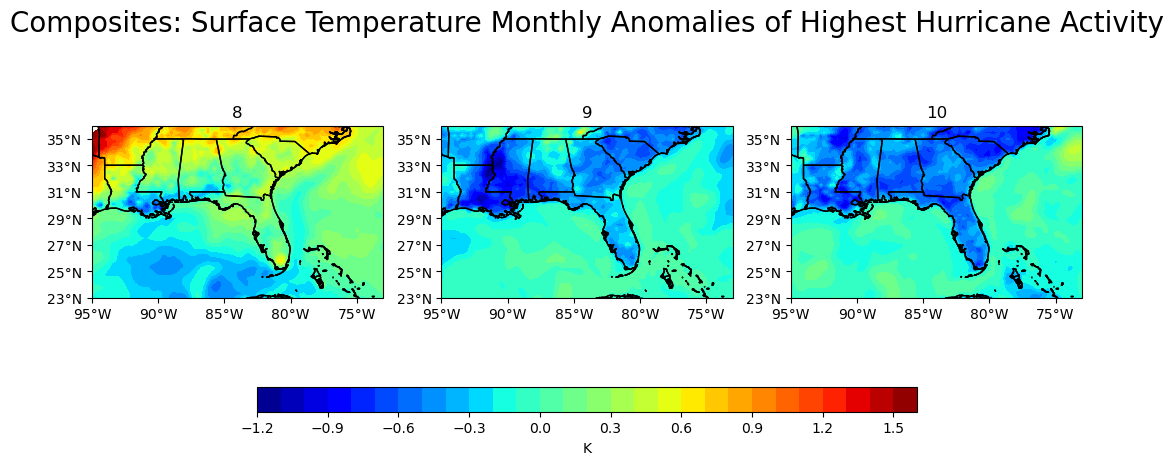

In [40]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=1,ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,5))

# We will flatten it into a 1-D array
axs=axs.flatten()
clevs = np.arange(-1.2,1.7,0.1)
#Loop over all of the seasons and plot
for i in range(0,3):

        # Select the season
        data=comp_high[i]

        # Contour plot
        cs=axs[i].contourf(data['longitude'],data['latitude'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='jet')

        axs[i].set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        axs[i].set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the season
        axs[i].set_title(data['time.month'].values)

        # Draw the coastines for each subplot
        axs[i].coastlines()
        #ax.add_feature(cfeature.COASTLINE)
        axs[i].add_feature(feature.STATES)
        
        #.colorbar(cs)
        #axs[i].colorbar(cs, orientation='horizontal',label='K')
       
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.2)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.05])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='K')

# Add a big title at the top
plt.suptitle('Composites: Surface Temperature Monthly Anomalies of Highest Hurricane Activity',fontsize=20)

## Low Hurricane Activity

In [44]:
a5 = ds_anoms[6,:,:]
a6 = ds_anoms[9,:,:]
a7 = ds_anoms[12,:,:]

s5 = ds_anoms[7,:,:]
s6 = ds_anoms[13,:,:]
s7 = ds_anoms[16,:,:]

o5 = ds_anoms[8,:,:]
o6 = ds_anoms[11,:,:]
o7 = ds_anoms[14,:,:]

In [45]:
a8 = (a5 + a6) / 2
print(a8)

s8 = (s5 + s6) / 2
print(s8)

o8 = (o5 + o6) / 2
print(o8)

<xarray.DataArray 'ts' (latitude: 53, longitude: 89)>
array([[-1.9783228 , -1.91945259, -1.88826903, ..., -0.51259769,
        -0.43907584, -0.39203307],
       [-2.01219411, -2.14337704, -1.88047331, ..., -0.48423734,
        -0.46246346, -0.49149532],
       [-2.01783859, -1.9052044 , -1.85816127, ..., -0.49754375,
        -0.51394182, -0.55722107],
       ...,
       [ 0.08444599,  0.09237577,  0.11361206, ..., -0.0607162 ,
        -0.07724799, -0.09808103],
       [ 0.11482194,  0.12705272,  0.14788613, ..., -0.03813536,
        -0.05654862, -0.07227518],
       [ 0.16401553,  0.1728868 ,  0.19143513, ..., -0.0229468 ,
        -0.03934466, -0.04673677]])
Coordinates:
  * latitude   (latitude) float64 36.0 35.75 35.5 35.25 ... 23.5 23.25 23.0
  * longitude  (longitude) float64 265.0 265.2 265.5 265.8 ... 286.5 286.8 287.0
    month      int64 8
<xarray.DataArray 'ts' (latitude: 53, longitude: 89)>
array([[0.42430416, 0.29999775, 0.45069233, ..., 0.48083106, 0.4622197 ,
        0.467

In [46]:
a_low = (a8 + a7) / 2
print(a_low)

s_low = (s8 + s7) / 2
print(s_low)

o_low = (o8 + o7) / 2
print(o_low)

comp_low = [a_low, s_low, o_low]

<xarray.DataArray 'ts' (latitude: 53, longitude: 89)>
array([[-1.88221612, -1.79350617, -1.95688024, ..., -0.3483447 ,
        -0.35990457, -0.38685345],
       [-1.74149021, -1.99706845, -1.80331847, ..., -0.31998472,
        -0.32321126, -0.33369513],
       [-1.65903026, -1.4711943 , -1.35580409, ..., -0.28530673,
        -0.29626196, -0.31534773],
       ...,
       [ 0.2236977 ,  0.23324035,  0.23814661, ...,  0.01966427,
         0.00817336, -0.01286107],
       [ 0.23330828,  0.23949073,  0.24923544, ...,  0.02027011,
         0.01234032, -0.00580464],
       [ 0.24661413,  0.24822695,  0.25729926, ...,  0.02658821,
         0.02127912,  0.00501538]])
Coordinates:
  * latitude   (latitude) float64 36.0 35.75 35.5 35.25 ... 23.5 23.25 23.0
  * longitude  (longitude) float64 265.0 265.2 265.5 265.8 ... 286.5 286.8 287.0
    month      int64 8
    time       datetime64[ns] 2015-08-01
<xarray.DataArray 'ts' (latitude: 53, longitude: 89)>
array([[-0.54703183, -0.54467089, -0.71751796

Text(0.5, 0.98, 'Composites: Surface Temperature Monthly Anomalies of Lowest Hurricane Activity')

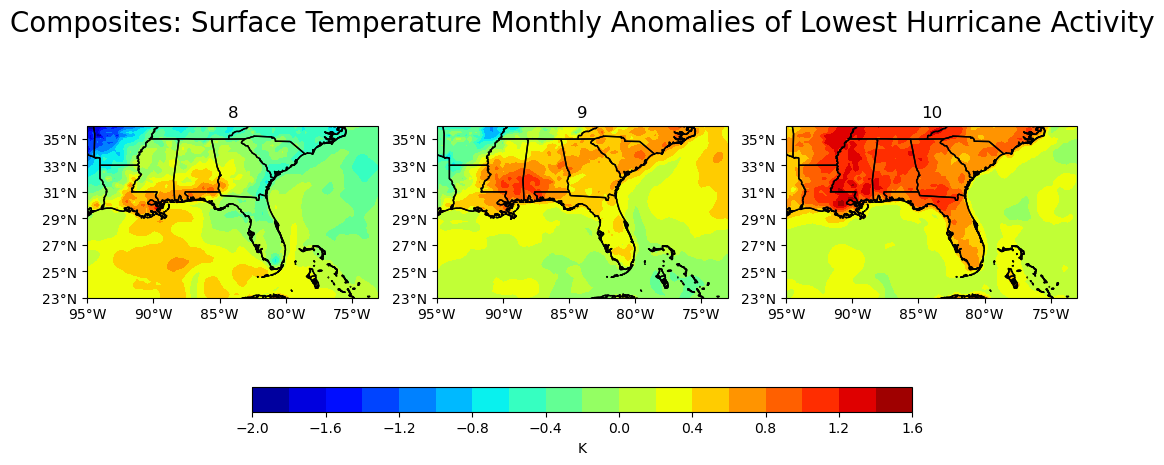

In [54]:
 # Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=1,ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,5))

# We will flatten it into a 1-D array
axs=axs.flatten()
clevs = np.arange(-2,1.8,0.2)
#Loop over all of the seasons and plot
for i in range(0,3):

        # Select the season
        data=comp_low[i]

        # Contour plot
        cs=axs[i].contourf(data['longitude'],data['latitude'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='jet')

        axs[i].set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        axs[i].set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the season
        axs[i].set_title(data['time.month'].values)

        # Draw the coastines for each subplot
        axs[i].coastlines()
        #ax.add_feature(cfeature.COASTLINE)
        axs[i].add_feature(feature.STATES)
        
        #.colorbar(cs)
        #axs[i].colorbar(cs, orientation='horizontal',label='K')
       
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.2)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.05])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='K')

# Add a big title at the top
plt.suptitle('Composites: Surface Temperature Monthly Anomalies of Lowest Hurricane Activity',fontsize=20)

Hurricanes favor warm water, and high relative humidity, and are low pressure systems. So, high anomalies in surface temperature and precipitation, and low anomalies in z500 can indicate conditions favorable for hurricane/tropical cyclone formation/places where tropical storms can migrate to (a big reason why many hurricanes have trajectories through warmer tropical/subtropical waters like the Caribbean Sea and the Gulf of Mexico). 

Using the composites from the alternative averaging method, we can make some observations:

Based on the surface temperature anomalies corresponding with high hurricane activity, we see that for August, the water was actually a little bit cooler than average, but September and October both had higher than average surface temperatures in the water. 

Based on the surface temperature anomalies corresponding with low hurricane activity, we that for August the water was warmer than average, but so was the land. For September, we see that the water was cooler than average around the tip of Florida, but was warmer in the higher latitudes of the subtropics. And for October, we see that the water did not really change beyond the average, meanwhile the land was warmer than average. 